<a href="https://colab.research.google.com/github/10-ThiagoB82/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processo de NLP 

Para explicar o processo de NLP, vou guiá-lo pela tarefa de classificação de sentimentos usando Python. Os passos para resolver este problema de NLP são:

1.Encontrar um conjunto de dados para classificação de sentimentos.


2.Preparando o conjunto de dados por tokenização, remoção de palavras irrelevantes.

3.Vetorização de texto.

4.Treinando um modelo de classificação para classificação de sentimento.


## Importando as bibliotecas Python necessárias e o Conjunto de Dados.

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews(Kaggle).


In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk

In [37]:
data = pd.read_csv('/content/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [38]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


## Preparação de Dados, Tokenização, Remoção de Stopwords e Stemming

Nosso conjunto de dados textual precisa de preparação antes de ser usado para qualquer problema baseado em PNL. Aqui iremos:

1.Remover links e todos os caracteres especiais da coluna de revisão.

2.Tokenize e remova as palavras irrelevantes da coluna de revisão.

3.Provoque as palavras na coluna de revisão





In [29]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Antes de prosseguir, vamos dar uma olhada rápida na nuvem de palavras da coluna de revisão:

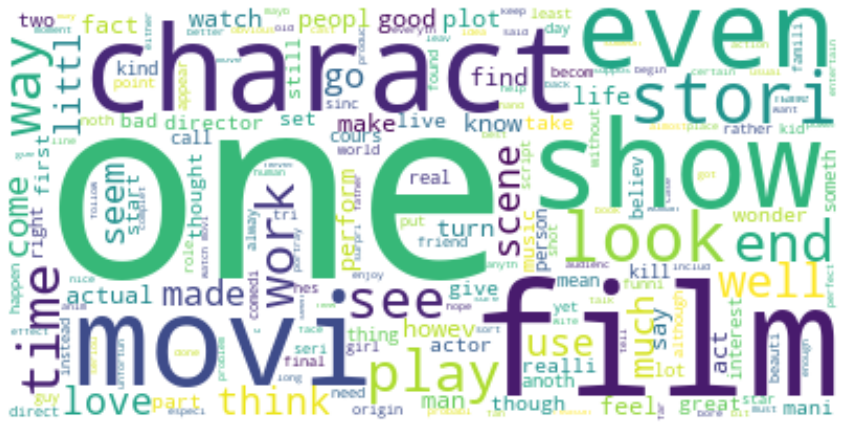

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Vetorização de Texto


O próximo passo é a vetorização de texto. Significa transformar todos os tokens de texto em vetores numéricos. Aqui, primeiro realizarei a vetorização de texto na coluna de recursos (coluna de revisão) e depois dividirei os dados em conjuntos de treinamento e teste:

In [31]:
x = np.array(data["review"])
y = np.array(data["sentiment"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Classificação de texto:

O passo final no processo de NLP é classificar ou agrupar textos. Como estamos trabalhando no problema de classificação de sentimentos, vamos agora treinar um modelo de classificação de texto. Veja como preparar um modelo de classificação de texto para classificação de sentimento:



In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

O conjunto de dados que usamos para treinar um modelo de classificação de sentimentos contém resenhas de filmes. Então, vamos testar o modelo dando uma resenha do filme como entrada:

In [41]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: A wonderful little production
['positive']
